In [1]:
!pip install -U plotly==5.24.1 kaleido==0.2.1


In [ ]:
# 🔧 Fix for Kaleido v1+ in Colab
!apt-get update -y
!apt-get install -y google-chrome-stable
!pip install -U plotly kaleido

# Register Chrome path with Kaleido
import kaleido
kaleido.get_chrome()


Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:6 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:7 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:9 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:10 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Fetched 128 kB in 1s (113 kB/s)
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done

<coroutine object get_chrome at 0x7ed08fc587b0>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


pio.renderers.default = "png"

plt.style.use("ggplot")


In [3]:
plt.style.use("ggplot")
pd.options.plotting.backend = "plotly"

In [4]:
url = "bank-full.csv"
df = pd.read_csv(url, sep=";")
print(df.head())



   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


In [5]:
label_cols = df.select_dtypes(include="object").columns
le = LabelEncoder()

In [6]:
for col in label_cols:
    if col != "y":
        df[col] = le.fit_transform(df[col])

df["y"] = df["y"].map({"no": 0, "yes": 1})

X = df.drop("y", axis=1)
y = df["y"]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [8]:
clf = DecisionTreeClassifier(max_depth=None, random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [9]:
y_pred = clf.predict(X_test)

acc = round(accuracy_score(y_test, y_pred), 4)
print(f"Accuracy: {acc}")
print(classification_report(y_test, y_pred))


Accuracy: 0.873
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     11977
           1       0.46      0.48      0.47      1587

    accuracy                           0.87     13564
   macro avg       0.69      0.70      0.70     13564
weighted avg       0.87      0.87      0.87     13564



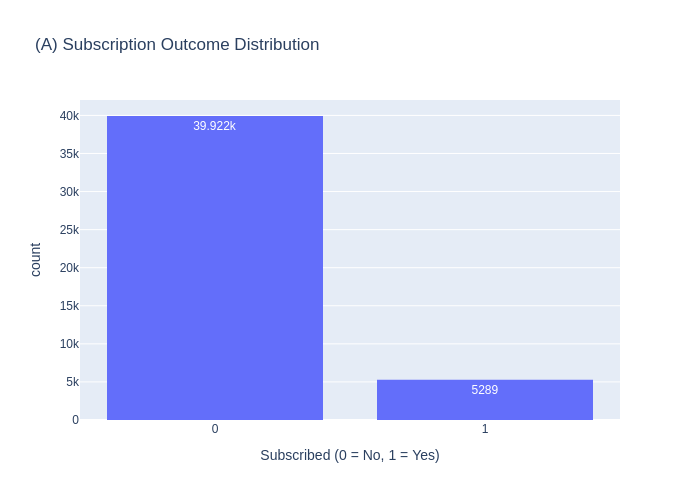

In [10]:
fig_a = px.histogram(df, x="y", nbins=2, text_auto=True,
                     title="(A) Subscription Outcome Distribution",
                     labels={"y": "Subscribed (0 = No, 1 = Yes)"})
fig_a.update_xaxes(type="category")
fig_a.show()

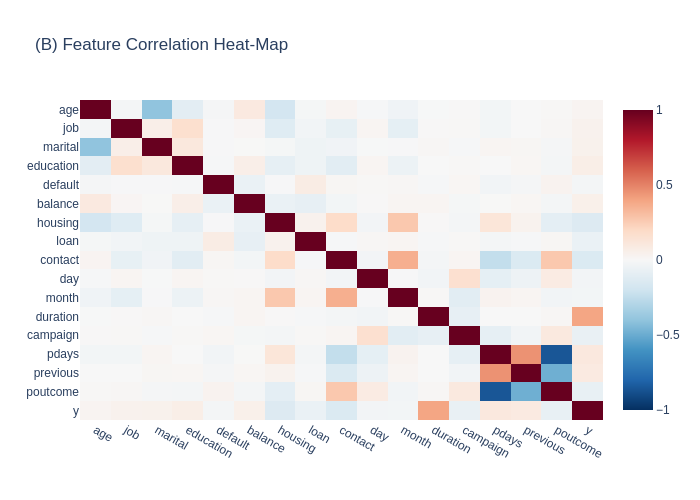

In [11]:
num_df = df.copy()
corr = num_df.corr()
fig_b = px.imshow(corr,
                  title="(B) Feature Correlation Heat-Map",
                  aspect="auto",
                  color_continuous_scale="RdBu_r",
                  zmin=-1, zmax=1)
fig_b.show()

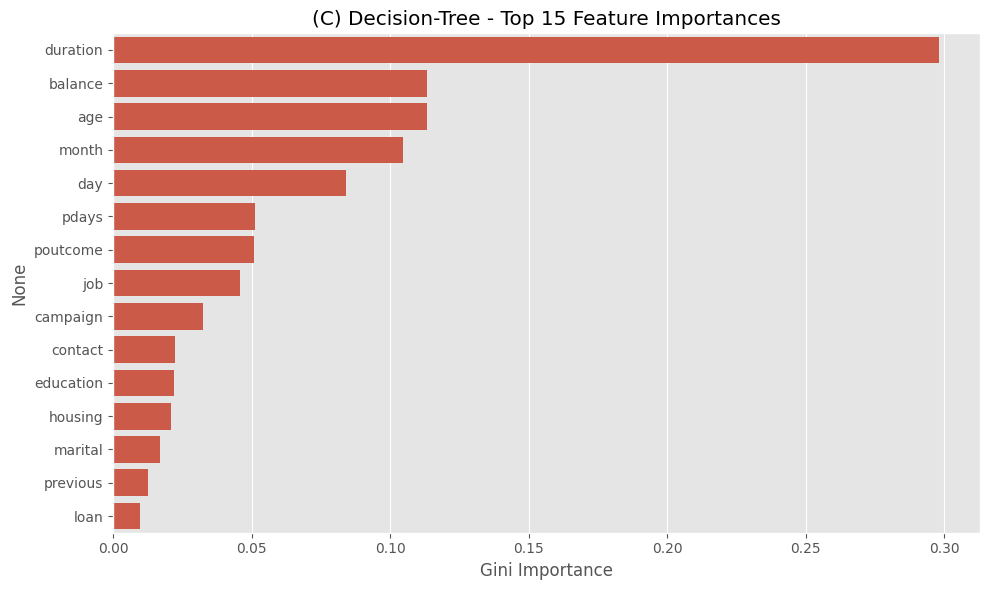

In [12]:
importances = pd.Series(clf.feature_importances_, index=X.columns)\
                .sort_values(ascending=False)[:15]       # top-15 for clarity
plt.figure(figsize=(10, 6))
sns.barplot(x=importances.values, y=importances.index, orient="h")
plt.title("(C) Decision-Tree - Top 15 Feature Importances")
plt.xlabel("Gini Importance")
plt.tight_layout()
plt.show()


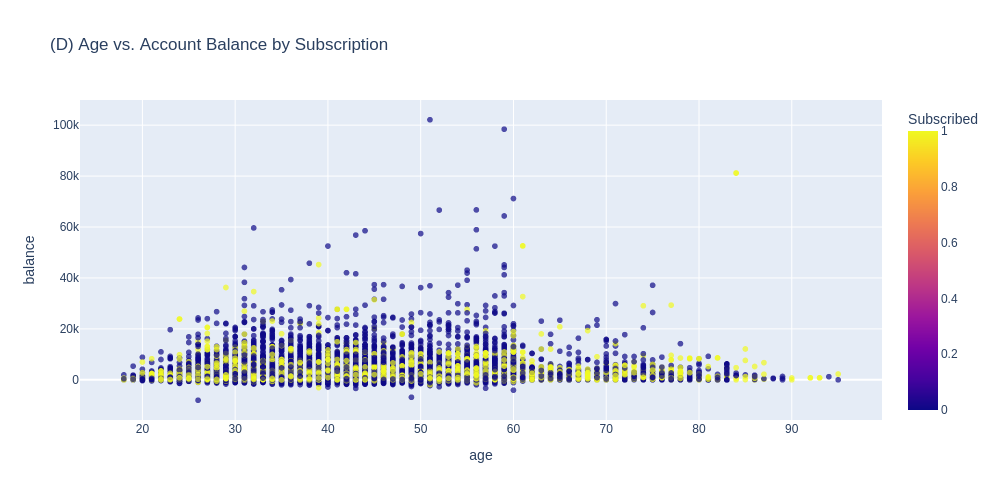

In [19]:
fig_d = px.scatter(
    df, x="age", y="balance", color="y",
    title="(D) Age vs. Account Balance by Subscription",
    labels={"y": "Subscribed"}
)

fig_d.update_traces(opacity=0.7)

# 👇 Make plot wider (e.g. 1000px wide and 500px tall)
fig_d.update_layout(width=1000, height=500)

fig_d.show()


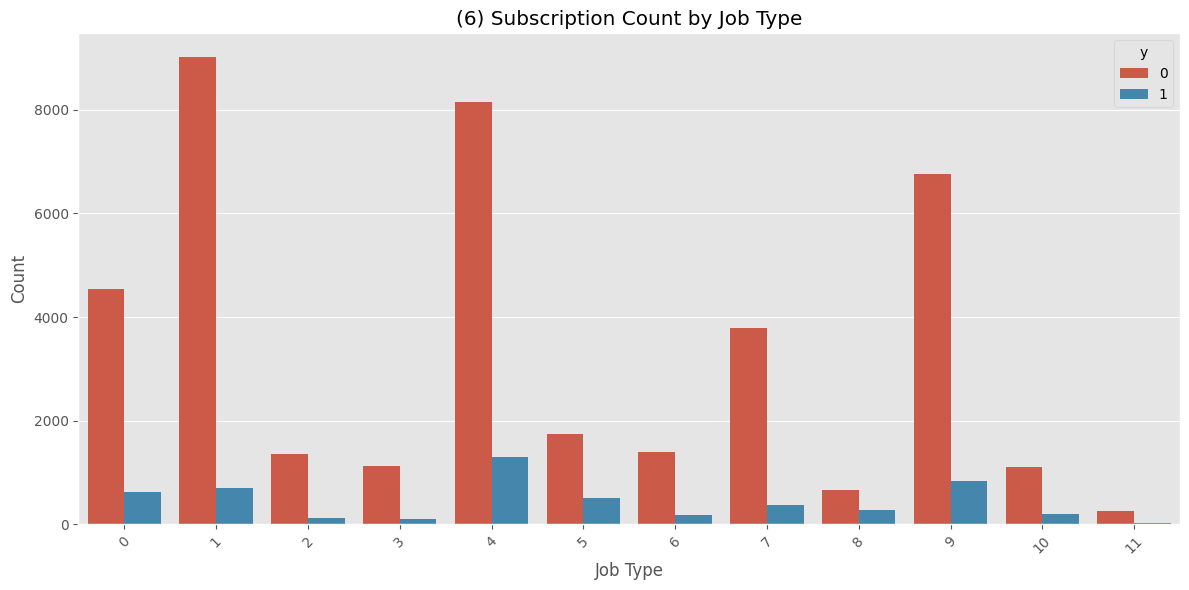

In [20]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='job', hue='y')
plt.title("(6) Subscription Count by Job Type")
plt.xlabel("Job Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

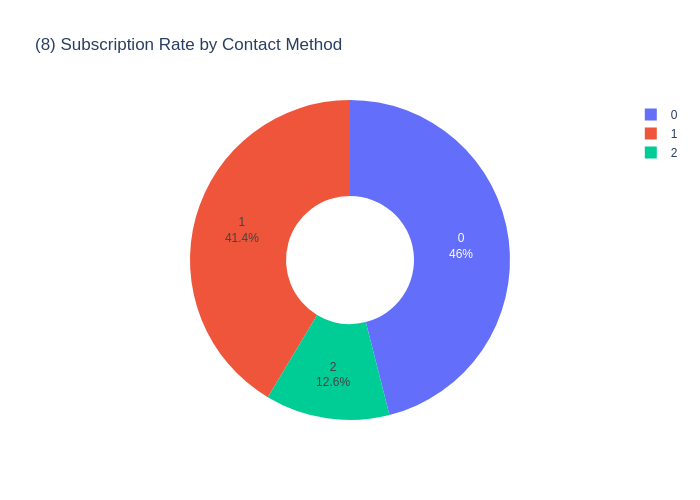

In [21]:
contact_counts = df.groupby('contact')['y'].mean().reset_index()
fig8 = px.pie(contact_counts, values='y', names='contact',
              title="(8) Subscription Rate by Contact Method",
              hole=0.4)
fig8.update_traces(textinfo='percent+label')
fig8.show()